# Importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

C:\Users\Saket\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (5.2.0)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve,auc
from sklearn.calibration import calibration_curve
import import_ipynb
from DataPreProcessing import new_df,X,y,X_train, X_test, y_train,y_test,sc

importing Jupyter notebook from DataPreProcessing.ipynb


# Separate the dataset into non-fraudulent and fraudulent transactions

In [3]:
non_fraud = new_df[new_df['isFraud'] == 0]
fraud = new_df[new_df['isFraud'] == 1]

# Display the shapes of the non-fraudulent and fraudulent datasets

In [4]:
non_fraud.shape, fraud.shape

((1047433, 5), (1142, 5))

# Randomly sample the non-fraudulent dataset to match the size of the fraudulent dataset

In [5]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(1142, 5)

#  Combine fraud and non-fraud datasets to create a balanced dataset

In [6]:
data = fraud.append(non_fraud, ignore_index=True)

C:\Users\Saket\AppData\Local\Temp\ipykernel_68016\1994287645.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = fraud.append(non_fraud, ignore_index=True)


In [7]:
data

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,4,181.00,181.00,0.00,1
1,2,181.00,181.00,0.00,1
2,4,2806.00,2806.00,0.00,1
3,2,2806.00,2806.00,0.00,1
4,4,20128.00,20128.00,0.00,1
...,...,...,...,...,...
2279,2,75652.56,2982.00,0.00,0
2280,3,46892.87,4507217.16,4554110.03,0
2281,1,30340.89,38799.00,8458.11,0
2282,3,286090.05,5522178.61,5808268.66,0


# Count the number of fraudulent (1) and non-fraudulent (0) transactions in the combined dataset


In [8]:
data['isFraud'].value_counts()

1    1142
0    1142
Name: isFraud, dtype: int64

# Convert y_train and y_test to numpy arrays


In [9]:
y_train = np.array(y_train)
y_test = np.array(y_test)

 # Reshape X_train and X_test to include a third dimension for compatibility with convolutional neural networks


In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Display the new shapes of X_train and X_test after reshaping


In [11]:
X_train.shape, X_test.shape


((786431, 4, 1), (262144, 4, 1))

# Defining the architecture of a Convolutional Neural Network (CNN) 

In [12]:
epochs = 20
model = Sequential()
model.add(Conv1D(32,2, activation= 'relu', input_shape = X_train[0].shape)) 
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

# Display a summary of the model architecture, including layer types, output shapes, and number of parameters


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 32)             96        
                                                                 
 batch_normalization (BatchN  (None, 3, 32)            128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 3, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             4160      
                                                                 
 batch_normalization_1 (Batc  (None, 2, 64)            256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 2, 64)             0

# Compile the Model

In [14]:
model.compile(optimizer = Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

# Train the Model

In [15]:
model_training_results = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test,y_test), verbose=1)

Epoch 1/20
24576/24576 [==============================] - 134s 5ms/step - loss: 0.0074 - accuracy: 0.9988 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 2/20
24576/24576 [==============================] - 159s 6ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 3/20
24576/24576 [==============================] - 220s 9ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 4/20
24576/24576 [==============================] - 76s 3ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 5/20
24576/24576 [==============================] - 72s 3ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 6/20
24576/24576 [==============================] - 72s 3ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 7/20
24576/24576 [==============================] - 97s 4ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss

# To Check if the model is overfitting or underfitting

In [16]:
y_train_pred_cnn = model.predict(X_train)
y_val_pred_cnn = model.predict(X_test)

# Convert predictions to binary format (0 or 1)
y_train_pred_cnn_binary = np.where(y_train_pred_cnn > 0.5, 1, 0)
y_test_pred_cnn_binary = np.where(y_val_pred_cnn > 0.5, 1, 0)

# Calculate accuracy scores
train_accuracy_cnn = accuracy_score(y_train, y_train_pred_cnn_binary)
val_accuracy_cnn = accuracy_score(y_test, y_test_pred_cnn_binary)

8192/8192 [==============================] - 7s 810us/step


In [17]:
train_accuracy = round(train_accuracy_cnn)
val_accuracy = round(val_accuracy_cnn)
print("Training Accuracy:", train_accuracy )
print("Validation Accuracy:",  val_accuracy)


Training Accuracy: 1
Validation Accuracy: 1


In [18]:
if train_accuracy > val_accuracy:
    print("The model may be overfitting.")
elif train_accuracy < val_accuracy:
    print("The model may be underfitting.")
else:
    print("The model's performance on training and validation sets are similar")


The model's performance on training and validation sets are similar


# Predicting a new result

In [32]:
 
input_data = np.array([[4,181.00, 181.00,0.00]])

 
# Adjust the input shape according to your model's requirements
input_data_reshaped = input_data.reshape((1, input_data.shape[1], 1))  # (batch_size, sequence_length, num_features)

# Make predictions using the reshaped input data
predictions = model.predict(input_data_reshaped)

# Print the predictions
print(predictions)


1/1 [==============================] - 0s 17ms/step
[[1.]]


In [34]:
 
input_data = np.array([[1,9839.64, 170136.0,160296.36]])

 
# Adjust the input shape according to your model's requirements
input_data_reshaped = input_data.reshape((1, input_data.shape[1], 1))  # (batch_size, sequence_length, num_features)

# Make predictions using the reshaped input data
predictions = model.predict(input_data_reshaped)

# Print the predictions
print(predictions)


1/1 [==============================] - 0s 20ms/step
[[0.]]


# Prediciting the test set results

In [20]:
y_pred = model.predict(X_test)

8192/8192 [==============================] - 7s 846us/step


In [21]:
threshold = 0.5   #A threshold of 0.5 is often chosen when there is no specific preference for precision or recall. 
                  #It provides a balanced trade-off between the two metrics.
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Accuracy

In [22]:
accuracy = accuracy_score(y_test,y_pred_binary)
round(accuracy*100,2)

99.93

# Classification Report

In [23]:
print(classification_report(y_test, y_pred_binary))

'''
0- No Fraud
1- Fraud
'''

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261865
           1       0.88      0.38      0.53       279

    accuracy                           1.00    262144
   macro avg       0.94      0.69      0.76    262144
weighted avg       1.00      1.00      1.00    262144



'\n0- No Fraud\n1- Fraud\n'

# ROC Curve

8192/8192 [==============================] - 6s 749us/step


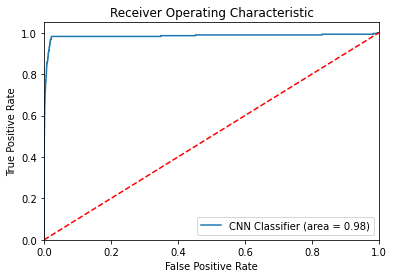

In [24]:
# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Calculate ROC AUC score
ann_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='CNN Classifier (area = %0.2f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall Curve

24576/24576 [==============================] - 26s 1ms/step


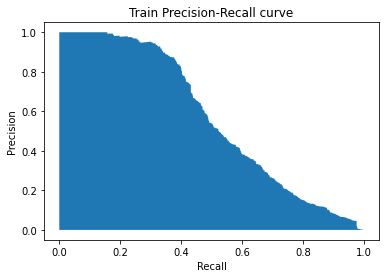

AUC-PRC: 0.5690112528282909


In [25]:
y_prob_train_ann = model.predict(X_train)

# Calculate precision-recall curve
precision_ann, recall_ann, _ = precision_recall_curve(y_train, y_prob_train_ann)

# Plot precision-recall curve
plt.fill_between(recall_ann, precision_ann)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")
plt.show()
from sklearn.metrics import precision_recall_curve, auc
auc_prc = auc(recall_ann, precision_ann)
print("AUC-PRC:", auc_prc)

# Confusion Matrix

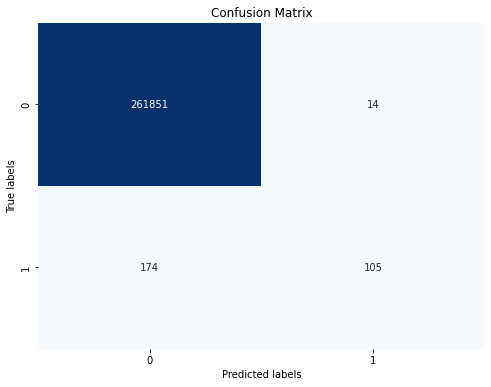

In [26]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Calibration Curve

24576/24576 [==============================] - 19s 760us/step


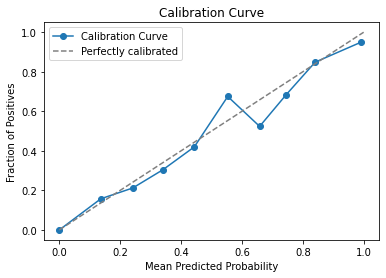

In [27]:
# Get predicted probabilities for the training set
y_prob_train_ann = model.predict(X_train)

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_train, y_prob_train_ann, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
